In [1]:
import keras
from keras.datasets import fashion_mnist 
#from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
#from keras.models import Sequential
#from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow
import tensorflow.keras as tk

In [2]:
(X_train, y_train), (X_test, y_test)= tk.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

In [7]:
y = y_train

In [8]:
from sklearn.decomposition import PCA
# Make an instance of the Model
variance = 0.98
pca = PCA(variance)

## K-MEANS ++

In [9]:
pca.fit(X_train)

PCA(n_components=0.98)

In [10]:
pca.n_components_ #dimension reduced from 784

349

In [11]:
X_train = pca.transform(X_train)

In [12]:
X_train.shape

(60000, 349)

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 ( we have 10 classes but can be divided into 4 broader classes)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [13]:
# #tocheck for best K_means cluster number
# inertia = []
# for k in range(1, 20):
#     kmeans = KMeans(init = "k-means++", n_clusters=k, random_state=1).fit(X_train)
#     inertia.append((kmeans.inertia_))

In [14]:
# plt.plot(range(1, 20), inertia, marker='s');
# plt.xlabel('$k - value $')
# plt.ylabel('$WCSS$')
# plt.plot()

In [15]:
k_means = KMeans(init = "k-means++", n_clusters = 10, n_init = 35)

In [16]:
k_means.fit(X_train)

KMeans(n_clusters=10, n_init=35)

In [17]:
k_means_labels = k_means.labels_

In [18]:
G = len(np.unique(k_means_labels)) #Number of labels


#Hitech 2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(k_means_labels,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue        

In [19]:
Y_clust = [[] for i in range(G)]
for n in range(G):
    Y_clust[n]=y[cluster_index[n]] #Y_clust[0] contains array of answers for the cluster_index[0]
    assert(len(Y_clust[n])==len(cluster_index[n]))
#Y_0 = y_train[cluster0_index]

In [20]:
#counts the number of each category in each cluster
def counter(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    label_index = dict(zip(unique, counts))
    return label_index

In [21]:
label_count= [[] for i in range(G)]
for n in range(G):
    label_count[n] = counter(Y_clust[n])

label_count[1] #Number of items of a certain type in cluster 1

{0: 2, 2: 1, 5: 1445, 6: 6, 7: 4702, 8: 238, 9: 177}

In [22]:
class_names = {0:'T-shirt/top', 1:'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5:
               'Sandal',6: 'Shirt', 7:'Sneaker',8:  'Bag',9: 'Ankle boot'}

def plotter(label_dict):
    plt.bar(range(len(label_dict)), list(label_dict.values()), align='center')
    a = []
    for i in [*label_dict]: a.append(class_names[i])
    plt.xticks(range(len(label_dict)), list(a), rotation=45, rotation_mode='anchor')

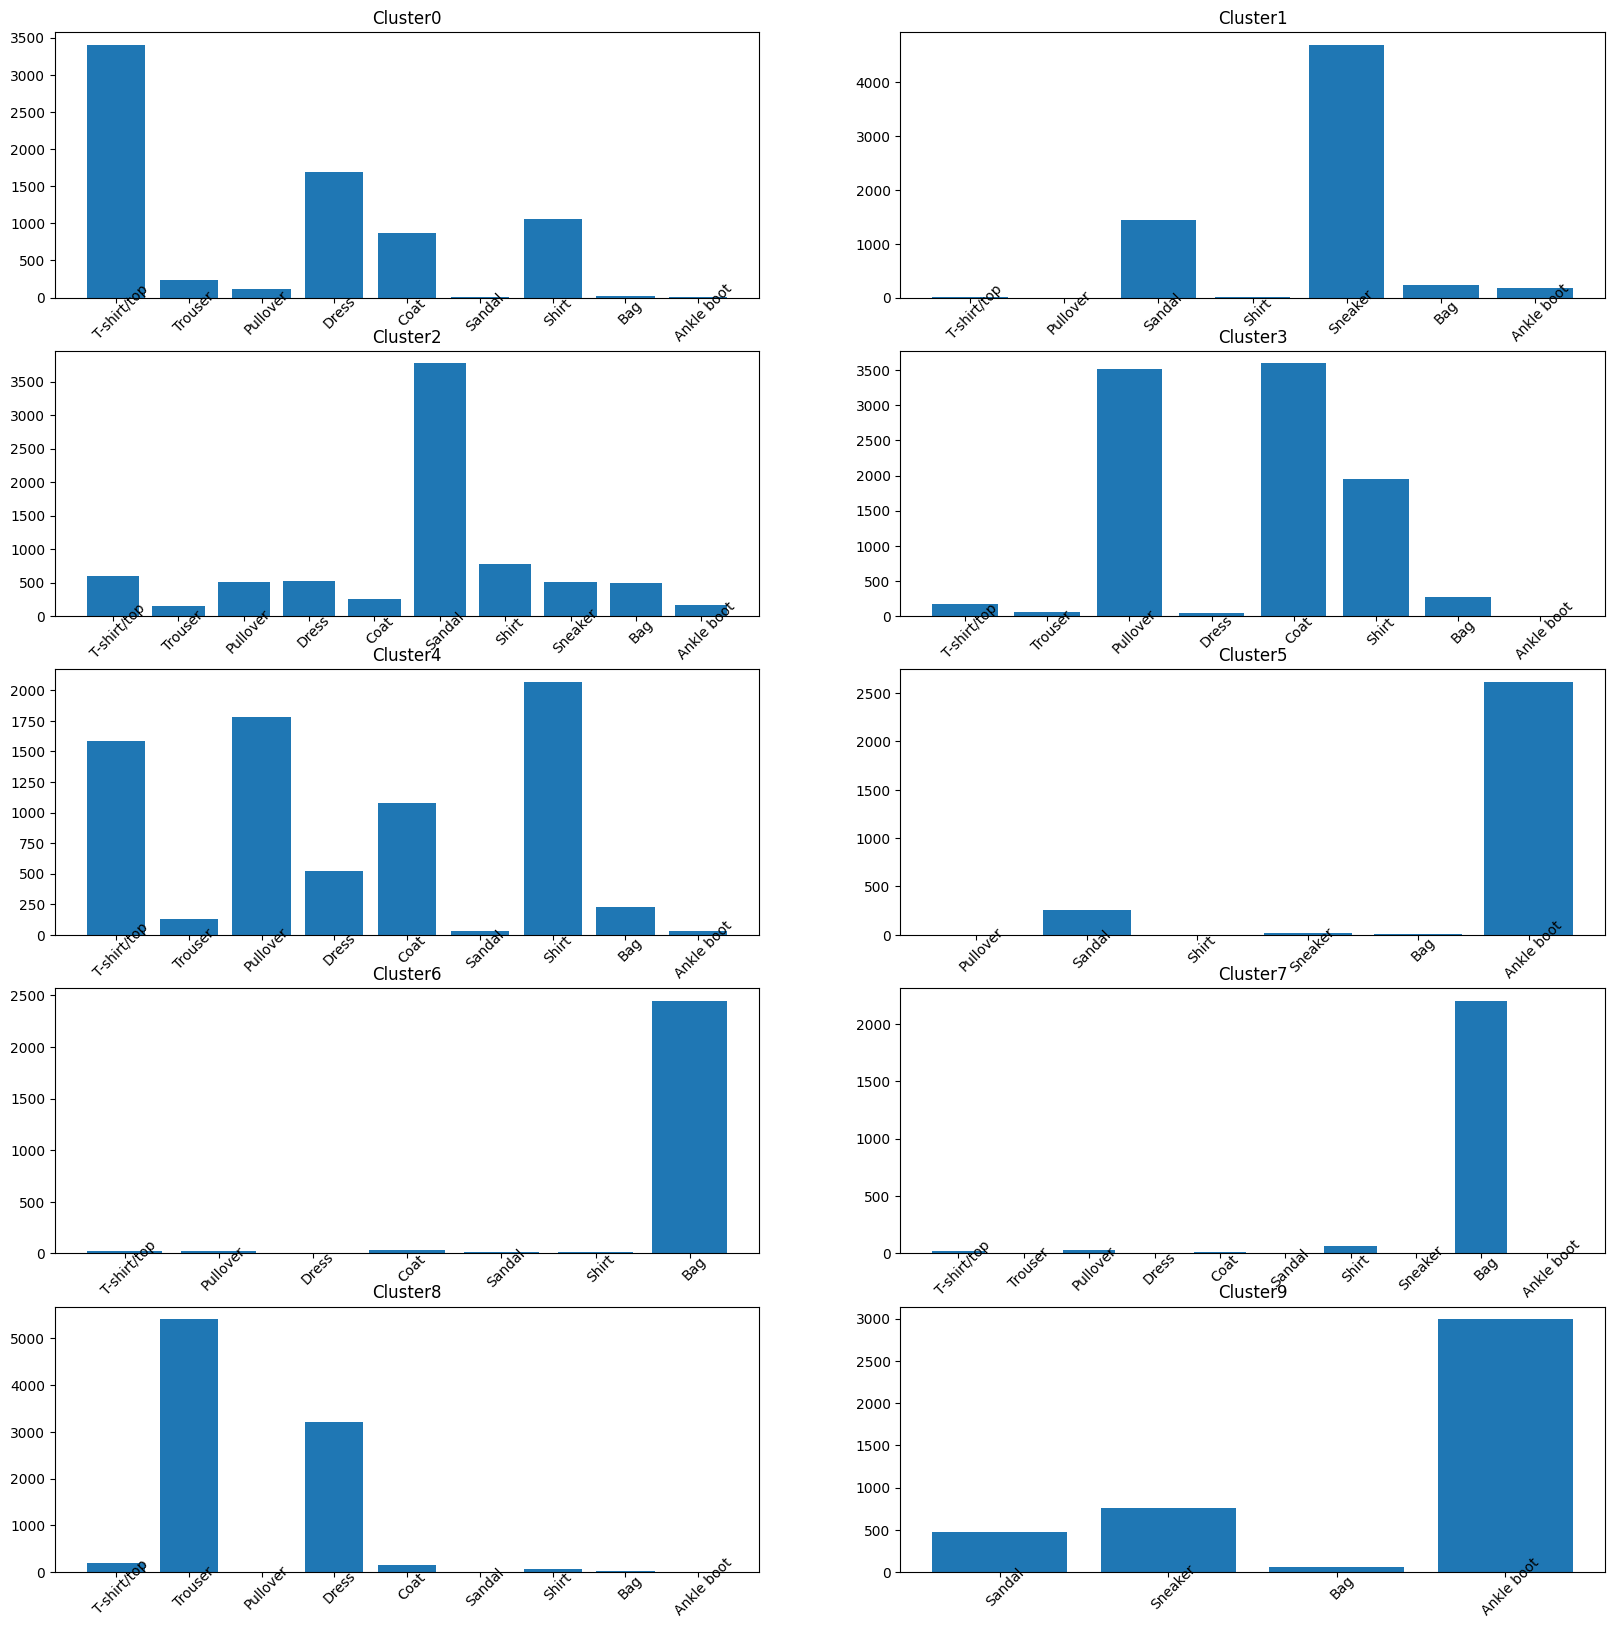

In [23]:
plt.figure(figsize=(20,20))
for i in range (1,11):
    plt.subplot(5, 2, i)
    plotter(label_count[i-1]) 
    plt.title("Cluster" + str(i-1))

In [24]:
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [25]:
#3D Plotly Visualisation of Clusters using go

layout = go.Layout(
    title='<b>Cluster Visualisation</b>',
    yaxis=dict(
        title='<i>Y</i>'
    ),
    xaxis=dict(
        title='<i>X</i>'
    )
)

colors = ['red','green' ,'blue','purple','magenta','yellow','cyan','maroon','teal','black']
trace = [ go.Scatter3d() for _ in range(11)]
for i in range(0,10):
    my_members = (k_means_labels == i)
    index = [h for h, g in enumerate(my_members) if g]
    trace[i] = go.Scatter3d(
            x=X_train[my_members, 0],
            y=X_train[my_members, 1],
            z=X_train[my_members, 2],
            mode='markers',
            marker = dict(size = 2,color = colors[i]),
            hovertext=index,
            name='Cluster'+str(i),
    #             line=dict(shape='spline')
            )

    #data.append(trace1)
fig = go.Figure(data=[trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6],trace[7],trace[8],trace[9]], layout=layout)
    
py.offline.iplot(fig)


In [26]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 4.89754520e+00, -2.58091208e+00, -1.06872218e+00, ...,
         1.36897460e-03, -3.76887516e-04,  4.89652831e-04],
       [-5.87735976e+00,  1.40606102e+00,  6.38990357e-01, ...,
         8.93877605e-04,  1.21158701e-03, -1.73006940e-04],
       [-5.38525667e+00, -1.14352410e+00,  1.31934842e+00, ...,
         3.81523222e-04,  1.14655570e-03,  9.47454028e-05],
       ...,
       [ 4.41946459e-01,  5.54133674e+00, -3.54872156e-01, ...,
        -1.61575711e-03, -6.19646652e-04, -1.45319655e-03],
       [ 1.43455467e-01, -5.22431034e+00, -1.46830490e+00, ...,
        -1.20283369e-03, -7.80542346e-04, -2.07410085e-04],
       [-3.73624741e+00,  4.36221618e+00, -2.64223386e+00, ...,
         6.29424849e-04,  5.32282884e-04,  1.13302036e-03]])

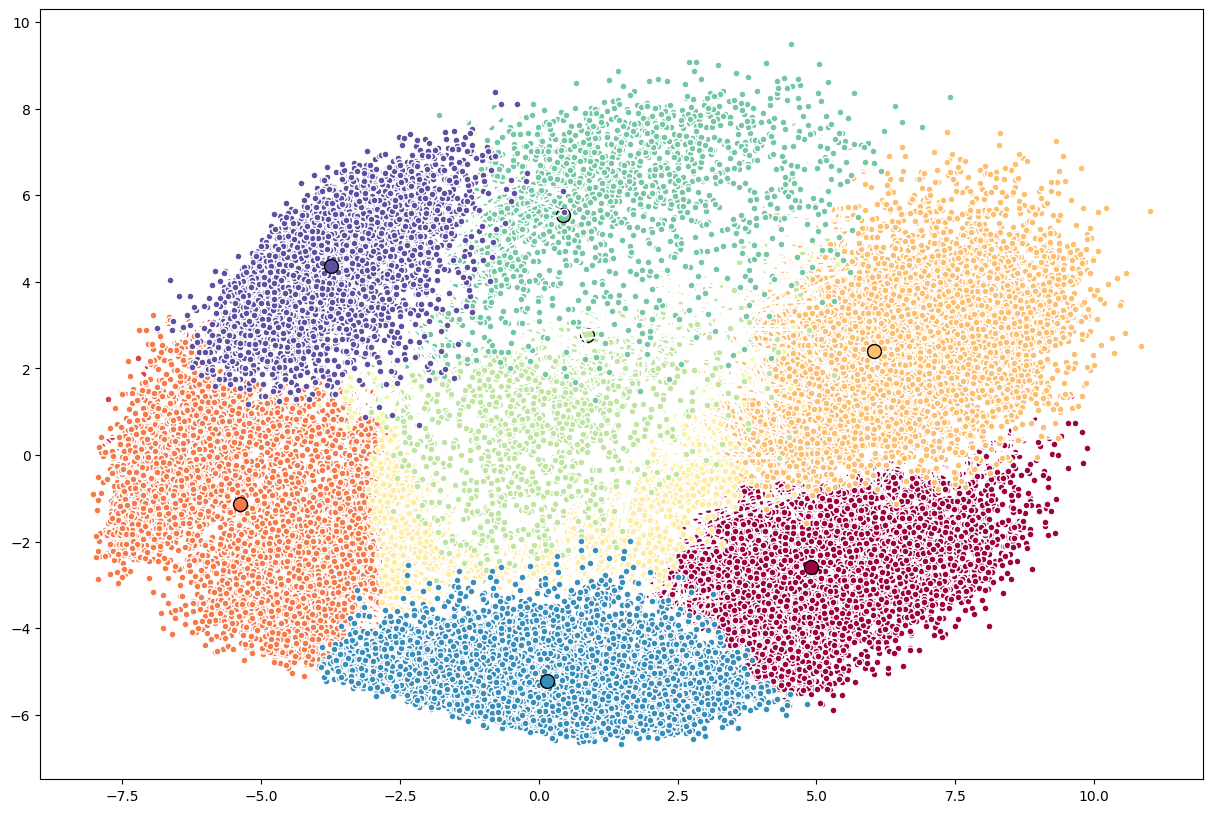

In [27]:

fig = plt.figure(figsize=(15, 10))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1,)
for k, col in zip(range(len(k_means.cluster_centers_)), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X_train[my_members, 0], X_train[my_members, 1], 'w', markerfacecolor=col, marker='.',markersize=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=10)
plt.show()